In [15]:
import pandas as pd 
import numpy as np 

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler


In [ ]:
df = pd.read_csv('../data/processed/futurice/blogs_with_analytics.csv')
df.head()

In [ ]:
final_df = df[['average session duration', 'bounce rate', 'sessions', 'full text']]
final_df['blog length'] = final_df['full text'].apply(lambda x: len(x))
final_df.drop('full text', axis=1, inplace=True)
final_df


In [ ]:
#Scaling
scaler = StandardScaler()
scaler.fit(final_df)
scaled_final_df = pd.DataFrame(scaler.transform(final_df),columns= final_df.columns )

print("All features in the sub dataframe are now scaled")
scaled_final_df.head()

In [19]:
scaled_final_df = scaled_final_df[scaled_final_df['blog length'] <= 3.5]
scaled_final_df = scaled_final_df[scaled_final_df['average session duration'] <= 1.5]
scaled_final_df = scaled_final_df[scaled_final_df['sessions'] <= 2]

#final_df = final_df[final_df['blog length'] <= 3.5]
#final_df = final_df[final_df['average session duration'] <= 1.5]
#final_df = final_df[final_df['sessions'] <= 2]

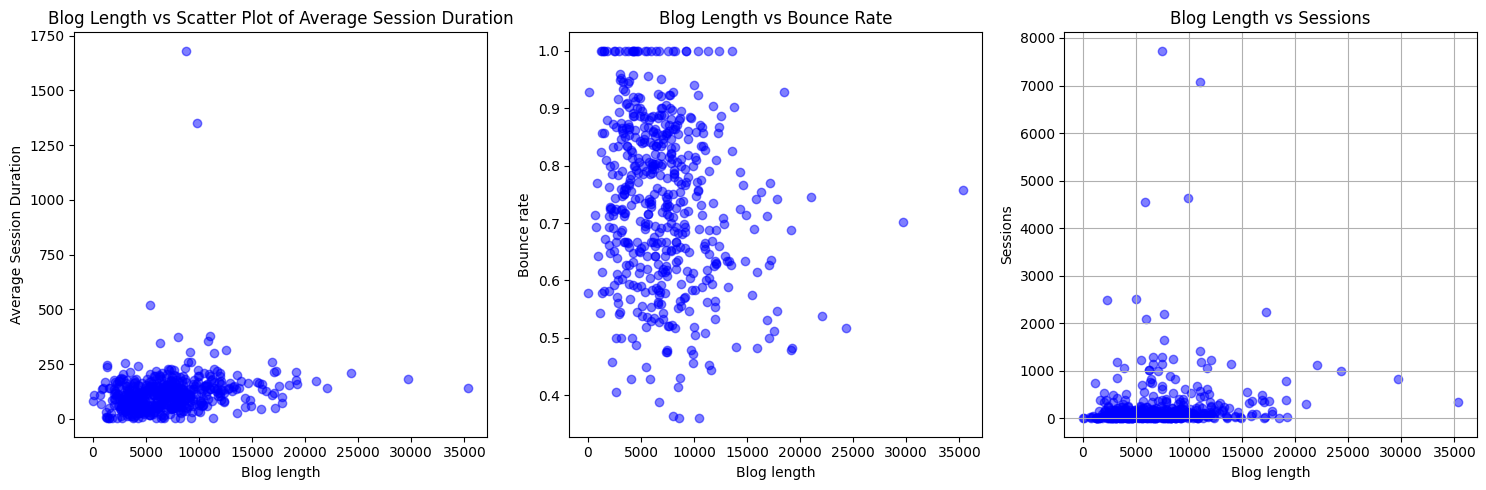

In [20]:
# plotting

# Create a figure with three subplots arranged in a 1x3 grid
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot data on each subplot
axes[0].scatter(final_df["blog length"], final_df["average session duration"], c='b', marker='o', alpha=0.5)
axes[0].set_title('Blog Length vs Scatter Plot of Average Session Duration')
axes[0].set_ylabel('Average Session Duration')
axes[0].set_xlabel('Blog length')
plt.grid(True)


axes[1].scatter(final_df["blog length"], final_df["bounce rate"], c='b', marker='o', alpha=0.5)
axes[1].set_title('Blog Length vs Bounce Rate')
axes[1].set_ylabel('Bounce rate')
axes[1].set_xlabel('Blog length')
plt.grid(True)

axes[2].scatter(final_df["blog length"], final_df["sessions"], c='b', marker='o', alpha=0.5)
axes[2].set_title('Blog Length vs Sessions')
axes[2].set_ylabel('Sessions')
axes[2].set_xlabel('Blog length')
plt.grid(True)

# Add labels, titles, and adjust spacing as needed
plt.tight_layout()

# Show the plots
plt.show()

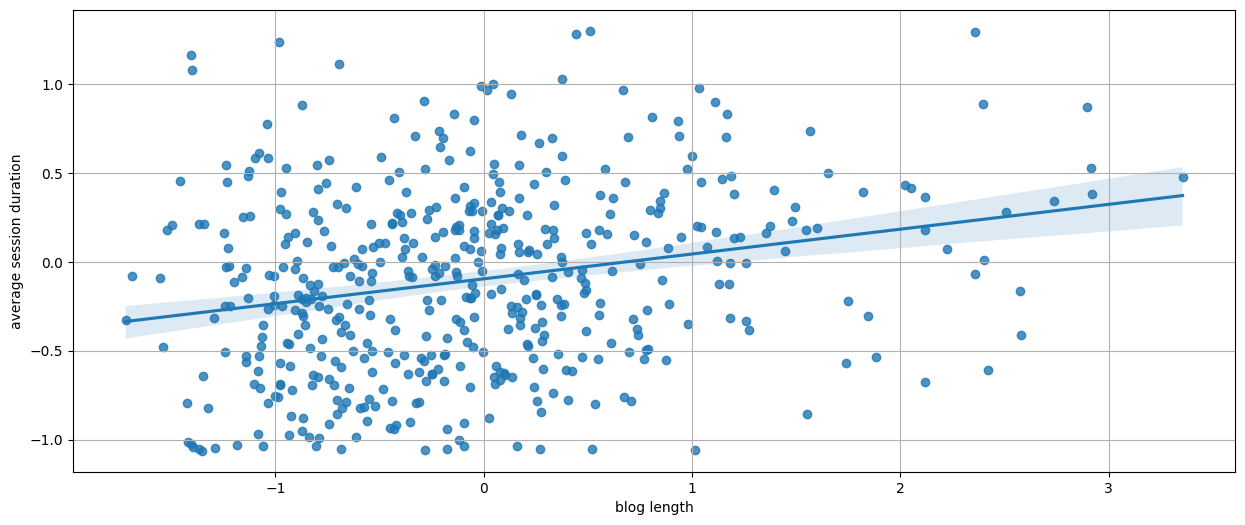

In [21]:
plt.figure(figsize=(15, 6))
sns.regplot(data=scaled_final_df, x='blog length', y = 'average session duration')
plt.grid(True)
plt.show()